# Loading

In [4]:
library(Signac)
library(Seurat)
library(ggplot2)
library(EnsDb.Mmusculus.v79)

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter




In [2]:
rna <- Read10X("../../raw_data/Chen_2019/GSE126074_AdBrainCortex_rna/", gene.column = 1)

In [3]:
# Initialize the Seurat object with the raw (non-normalized data).
snare <- CreateSeuratObject(counts = rna, project = "Chen_2019_rna", min.cells = 3, min.features = 200)

In [4]:
DefaultAssay(snare) <- "RNA"
snare

An object of class Seurat 
25403 features across 10309 samples within 1 assay 
Active assay: RNA (25403 features, 0 variable features)

# Basic QC

In [5]:
snare[["percent.mt"]] <- PercentageFeatureSet(snare, pattern = "^Mt")

In [6]:
# ribosomal genes
snare[["percent.ribo"]] <- Seurat::PercentageFeatureSet(snare, 
                                    pattern = "^Rp[sl]")

In [7]:
head(snare@meta.data, 5)

orig.ident nCount_RNA nFeature_RNA percent.mt percent.ribo
09A_CAGCCCCGCCTT 09A        4615       2343         0.3033586  0.2383532   
09A_CGCCTACCATGA 09A        4780       2348         0.2092050  0.1464435   
09A_GATGCGCGGCTA 09A        4867       2494         0.3492911  0.2671050   
09A_GGTCCGAGTCCT 09A        4663       2338         0.2787905  0.4074630   
09A_TCTCCCGGCACC 09A        4337       2157         0.2075167  0.4380908

In [8]:
Idents(snare) <- "all"

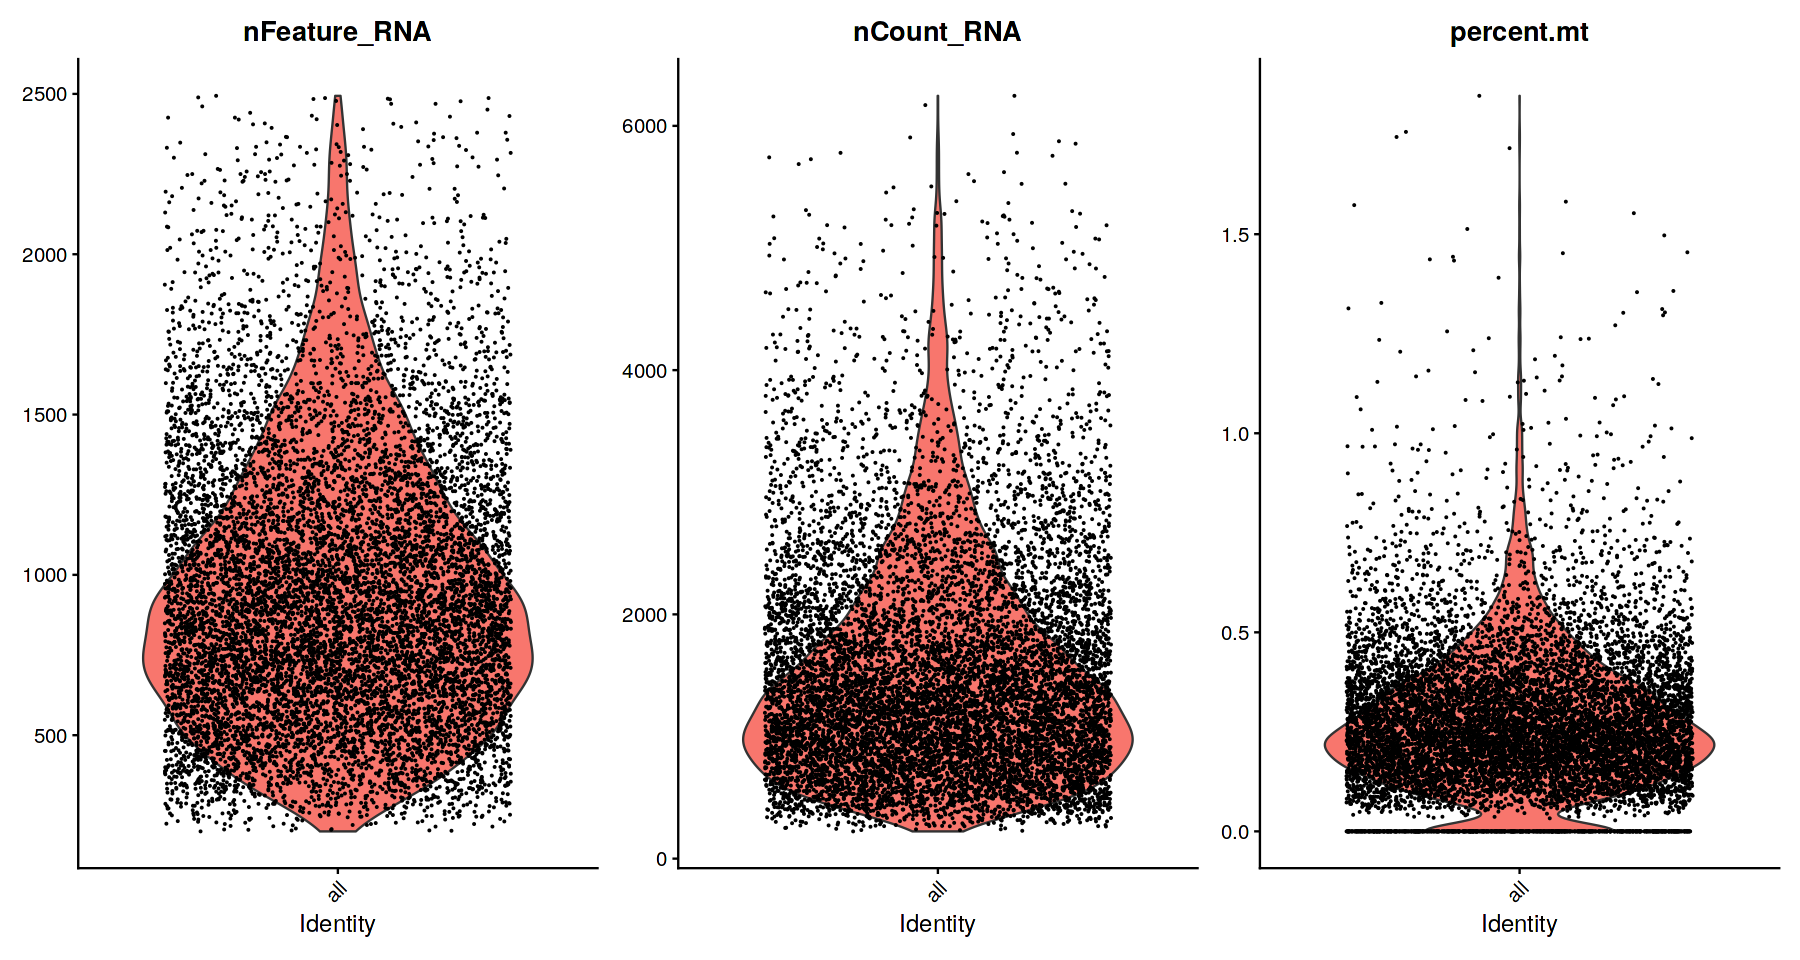

In [9]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=15, repr.plot.height=8)
VlnPlot(snare, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

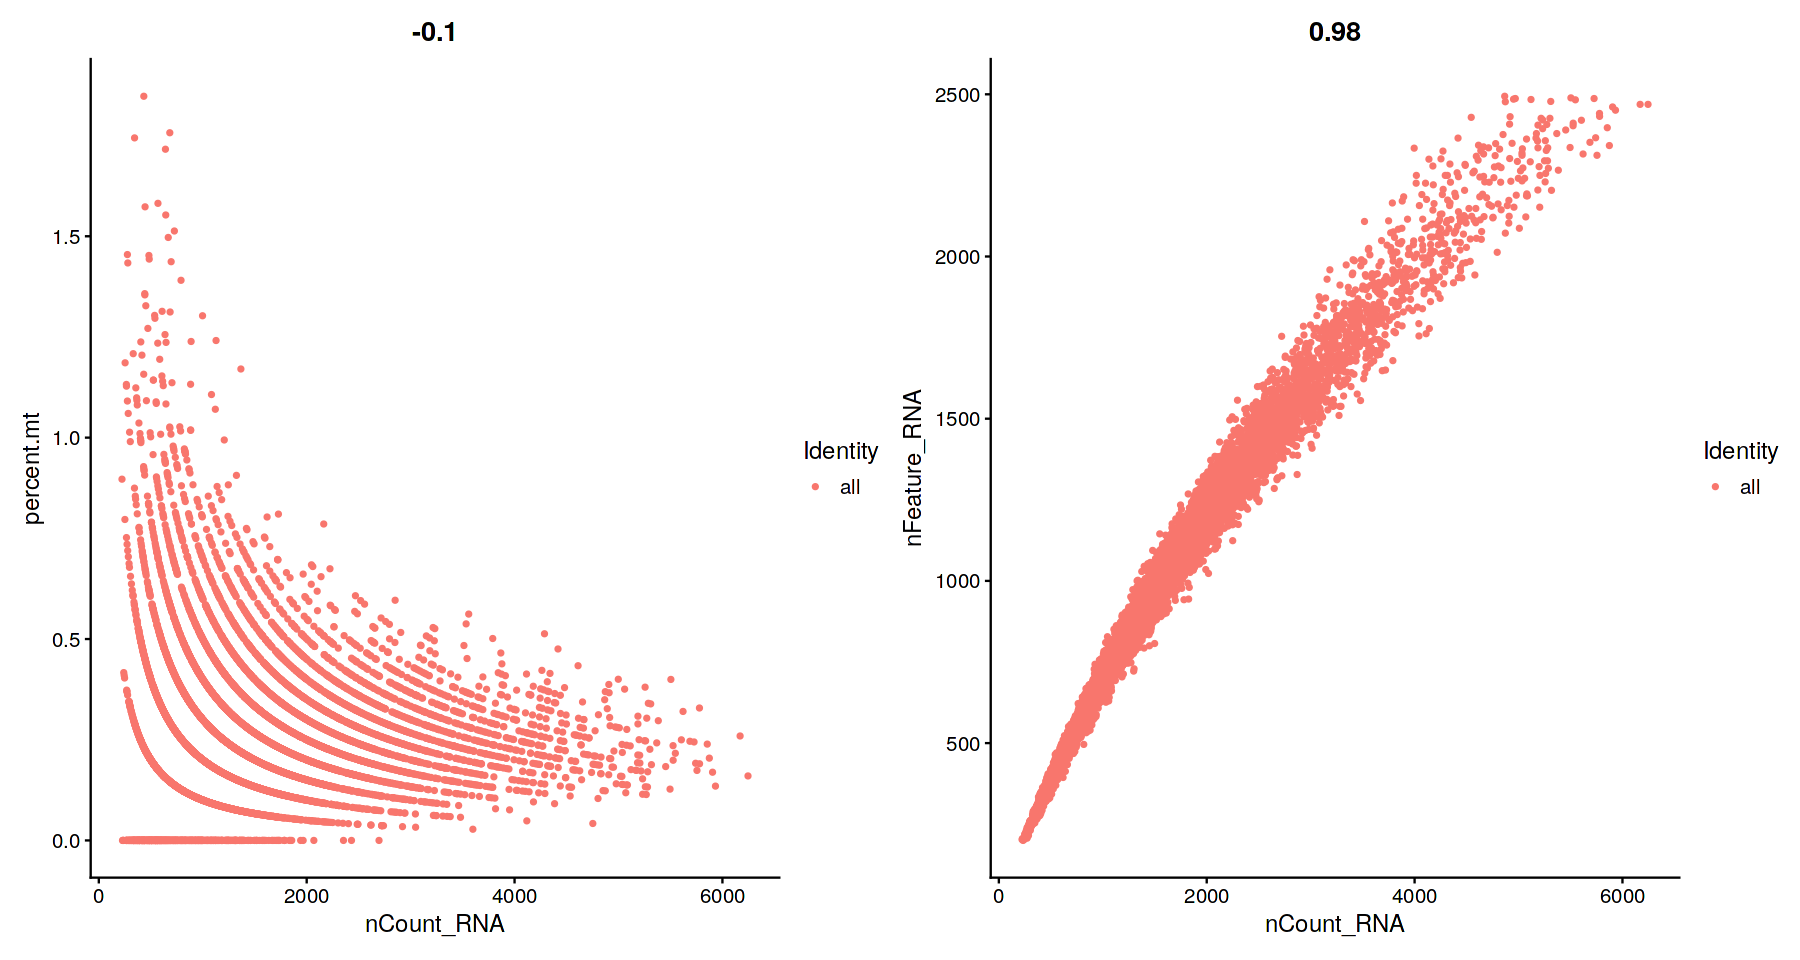

In [10]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(snare, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(snare, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

The quality of RNA data looks good.

In [11]:
snare <- subset(snare, subset = nCount_RNA > 800 & percent.mt < 5)

In [12]:
snare

An object of class Seurat 
25403 features across 8169 samples within 1 assay 
Active assay: RNA (25403 features, 0 variable features)

# Clustering

In [13]:
snare <- FindVariableFeatures(snare, nfeatures = 3000)
snare <- NormalizeData(snare)
snare <- ScaleData(snare)

Centering and scaling data matrix



When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"


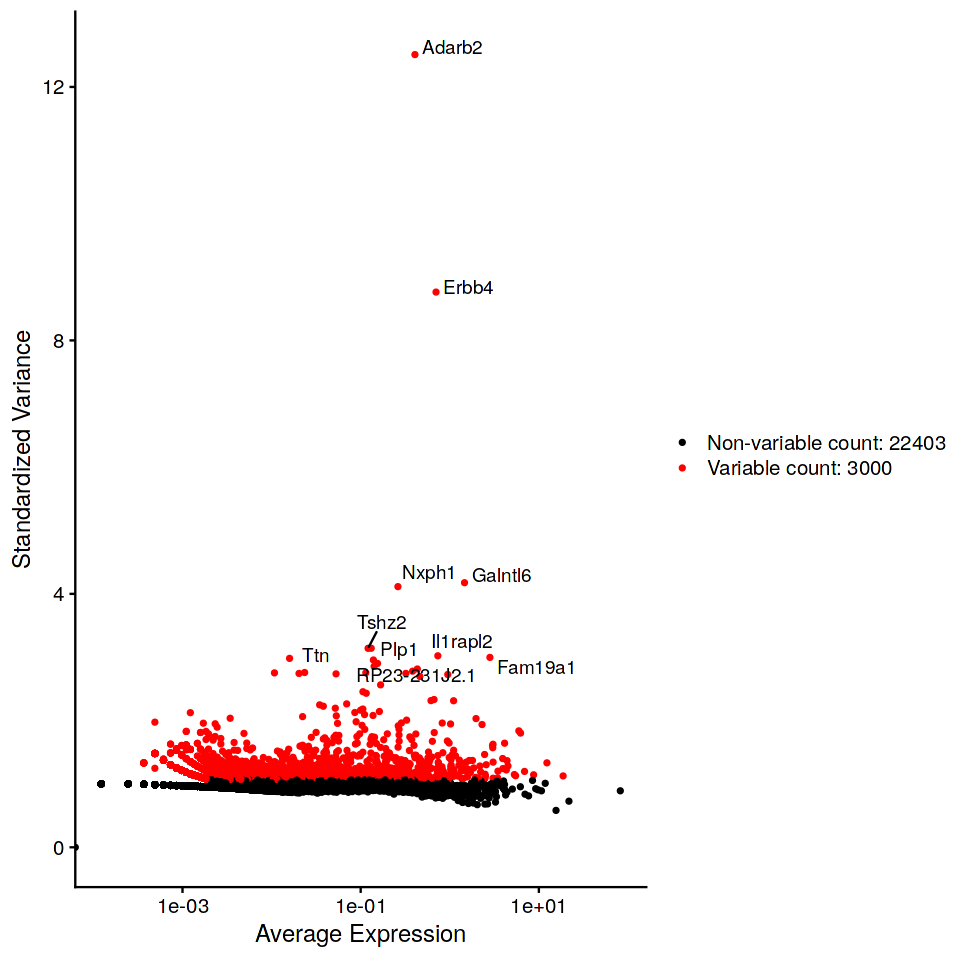

In [14]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(snare), 10)

options(repr.plot.width=8, repr.plot.height=8)
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(snare)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

PC_ 1 
Positive:  Atp1a2, Slc1a3, Ppap2b, Bcan, Ptprz1, Ntsr2, Aldoc, Mertk, F3, Slc7a10 
	   Glul, Slco1c1, Grin2c, S1pr1, Mt2, Prex2, Ndrg2, Mt1, Il18, Luzp2 
	   Apoe, Pla2g7, Npas3, Gpr37l1, Htra1, Acsbg1, Gjb6, Fgfr3, Zbtb20, Gpc5 
Negative:  Ptprd, Kcnip4, Lingo2, Tenm2, Opcml, Car10, Hs6st3, Kcnq5, Erc2, Nrxn3 
	   Kcnb2, Nlgn1, Fam19a1, Lrrtm4, Kctd16, Cacna2d3, Pdzrn3, Sgcz, Cdh12, Gm28928 
	   Gria4, Fstl4, Gpr158, Slit3, Asic2, Prkg1, Prr16, Nwd2, Unc5d, Ptprk 
PC_ 2 
Positive:  Lingo2, Hs6st3, Rorb, Unc5d, Pdzrn3, Cacna2d3, Fam19a1, A830036E02Rik, Kcnq5, Kcnb2 
	   Pde7b, Ptn, Car10, Prr16, Cdh12, Kcnh5, Fam19a2, Fstl4, Ptprk, Ntm 
	   Kcnip4, BC030499, Rora, Cpne9, Cux1, Atp1a2, Ptprd, Kctd16, Prkg1, Trpm3 
Negative:  Cdh18, Mgat4c, Hs3st4, Foxp2, Zfpm2, Dlc1, Thsd7b, Pde4d, Me3, Slc35f1 
	   Htr1f, Grik3, Garnl3, A830018L16Rik, Rbfox1, Nxph1, Gabrg3, Mctp1, Grm8, Ano4 
	   Etl4, Nrp1, Zfp804a, Grip1, Esrrg, Frmpd4, Sox5, Cntnap4, Pde1a, Cdh9 
PC_ 3 
Positive:  Hs3st4, Fox

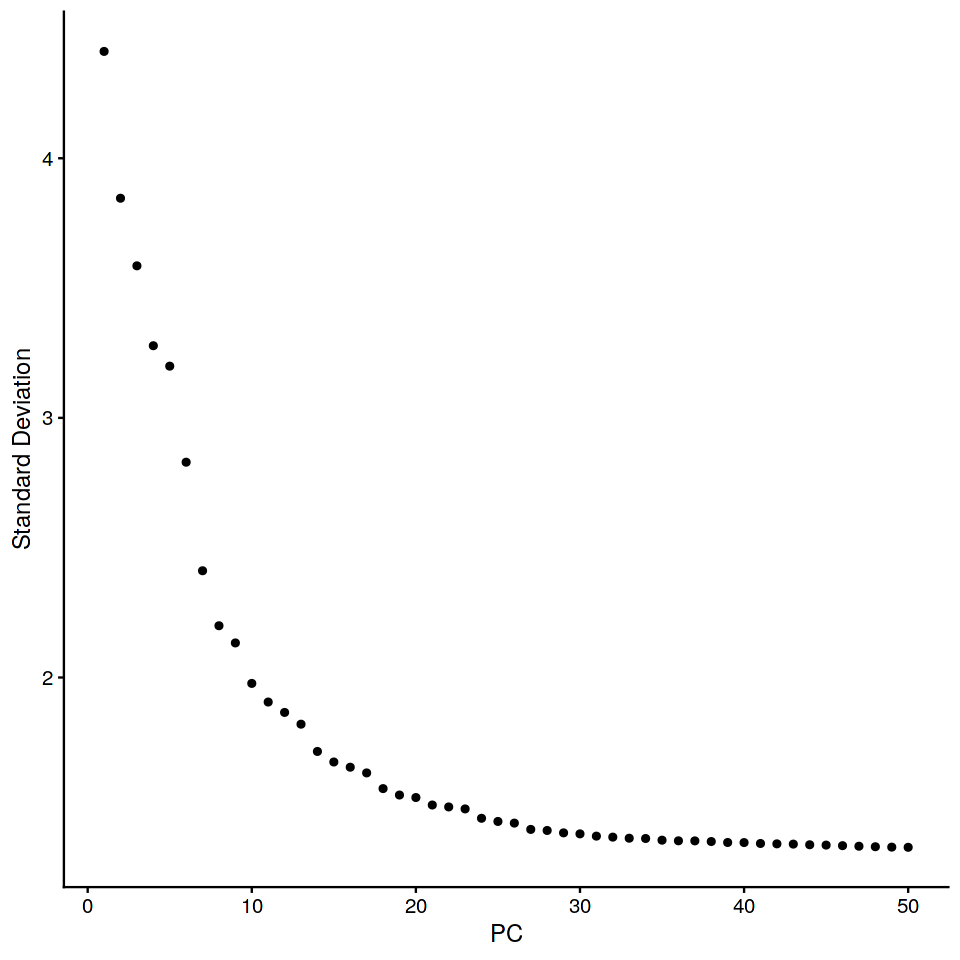

In [15]:
snare <- RunPCA(snare, features = VariableFeatures(object = snare))
ElbowPlot(snare, ndims = 50)

In [16]:
set.seed(1234)
snare <- FindNeighbors(snare, dims = 1:23)
snare <- FindClusters(snare, resolution = 0.4, algorithm = 3)
snare <- FindClusters(snare, resolution = 0.5, algorithm = 3)
snare <- FindClusters(snare, resolution = 0.6, algorithm = 3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8169
Number of edges: 311927

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.9075
Number of communities: 12
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8169
Number of edges: 311927

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8933
Number of communities: 13
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8169
Number of edges: 311927

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8796
Number of communities: 15
Elapsed time: 3 seconds


In [17]:
snare <- RunUMAP(snare, dims = 1:23, reduction.name = "umap.rna")

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
15:26:05 UMAP embedding parameters a = 0.9922 b = 1.112

15:26:05 Read 8169 rows and found 23 numeric columns

15:26:05 Using Annoy for neighbor search, n_neighbors = 30

15:26:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:26:07 Writing NN index file to temp file /tmp/Rtmp5Olz2i/filed21c4bf36857

15:26:07 Searching Annoy index using 1 thread, search_k = 3000

15:26:10 Annoy recall = 100%

15:26:11 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

Warning message in par(c(2, 2)):
"argument 1 does not name a graphical parameter"


NULL

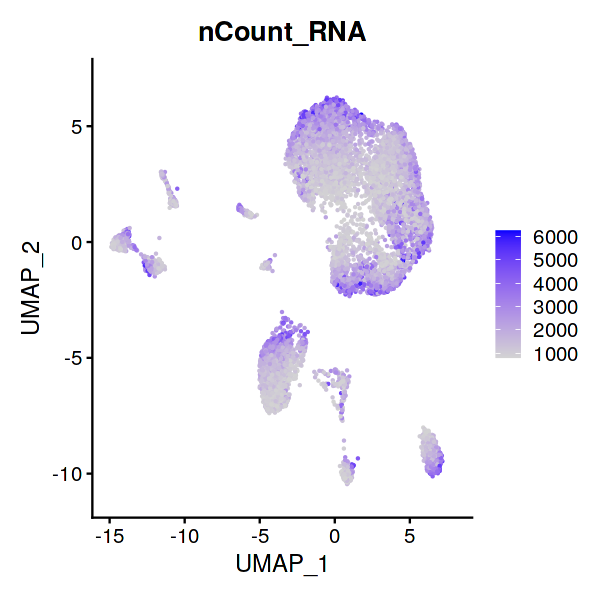

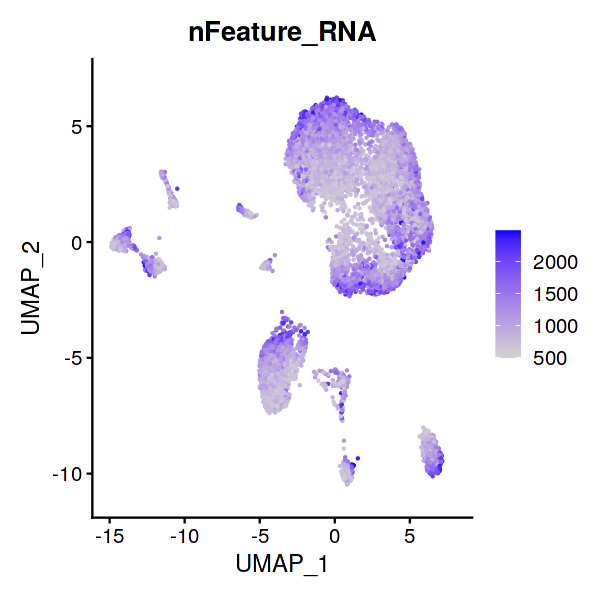

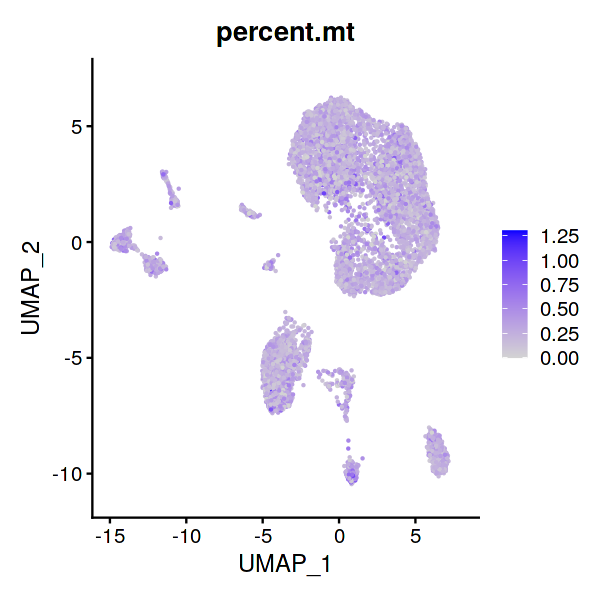

In [23]:
options(repr.plot.width=5, repr.plot.height=5)
FeaturePlot(snare,features = "nCount_RNA")
FeaturePlot(snare,features = "nFeature_RNA")
FeaturePlot(snare,features = "percent.mt")

In [24]:
saveRDS(snare, file="snare_rna_0.rds")

# Doublet identification

In [2]:
snare <- readRDS("snare_rna_0.rds")

## Simulation based method

In [3]:
library(scDblFinder)
library(scater)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCums

In [4]:
sce <- as.SingleCellExperiment(snare)
dbl.dens <- computeDoubletDensity(sce)
summary(dbl.dens)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1307  0.4411  0.9506  1.1600 17.7921 

In [5]:
snare$DoubletScore <- dbl.dens
sce$DoubletScore <- dbl.dens

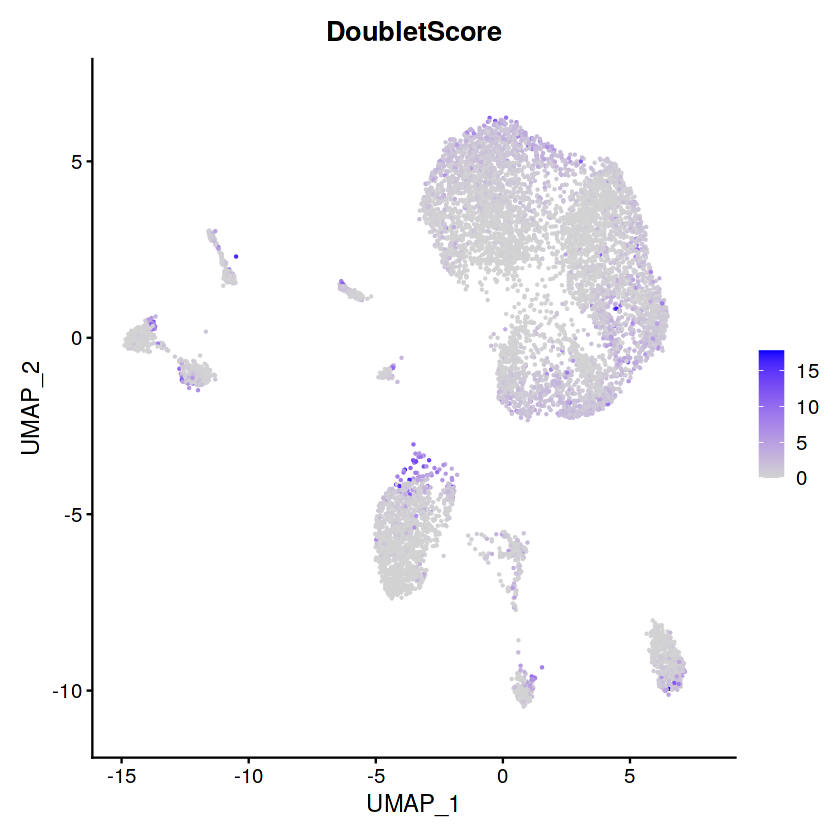

In [6]:
FeaturePlot(snare,features = "DoubletScore")

singlet doublet 
   7032    1137

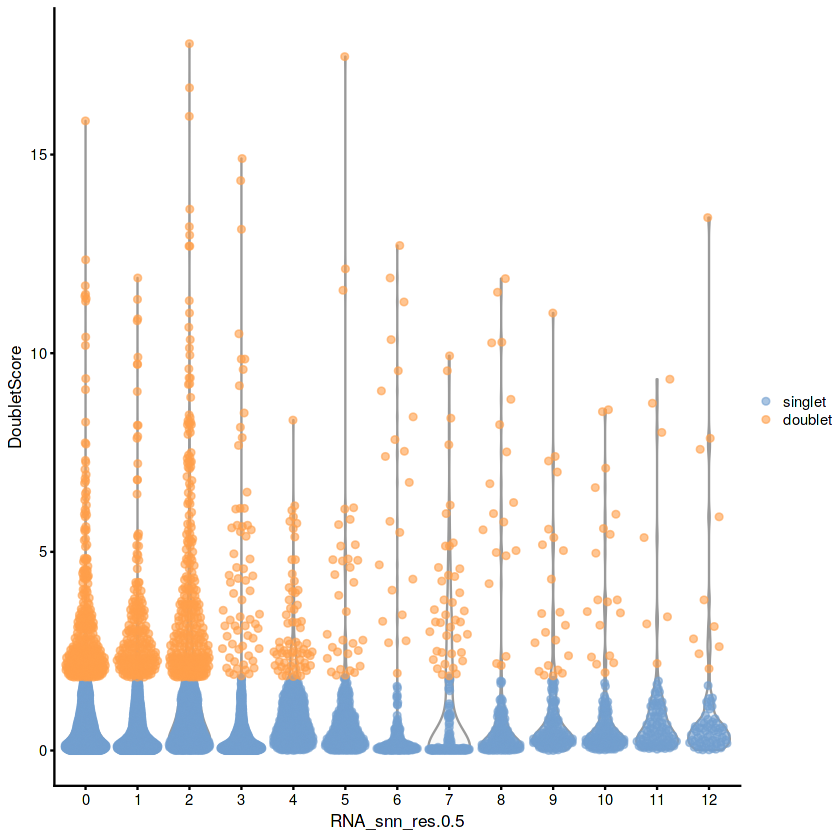

In [7]:
dbl.calls <- doubletThresholding(data.frame(score=dbl.dens),
    method="griffiths", returnType="call")
summary(dbl.calls)

plotColData(sce, x="RNA_snn_res.0.5", y="DoubletScore", colour_by=I(dbl.calls))

## Classifier-based method

13 clusters

Creating ~6536 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 669 cells excluded from training.

iter=1, 584 cells excluded from training.

iter=2, 579 cells excluded from training.

Threshold found:0.39

617 (7.6%) doublets called



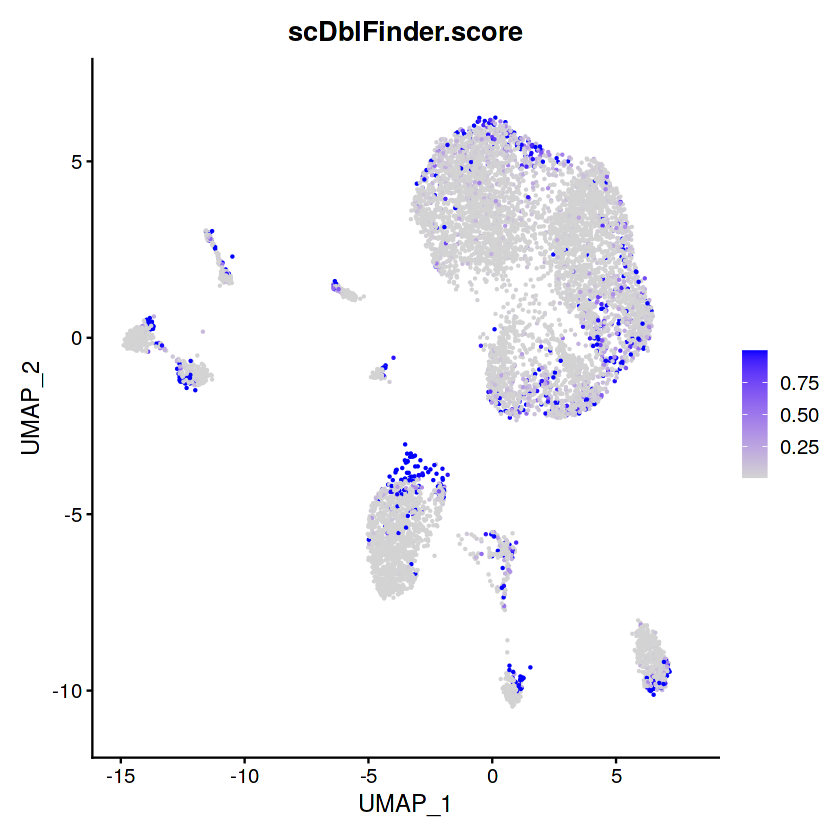

In [8]:
set.seed(10010101)
sce <- scDblFinder(sce, clusters=sce$RNA_snn_res.0.5)
# plotUMAP(sce, colour_by="scDblFinder.score")

snare$scDblFinder.score <- sce$scDblFinder.score
FeaturePlot(snare,features = "scDblFinder.score")

In [9]:
table(sce$scDblFinder.class)


singlet doublet 
   7552     617 

In [10]:
table(dbl.calls)

dbl.calls
singlet doublet 
   7032    1137 

**Remove doublets based on both the classifier method and the simulation method**

In [11]:
barcode_singlet <- colnames(sce)[sce$scDblFinder.class == "singlet" & dbl.calls == "singlet"]
# barcode_singlet <- colnames(sce)[sce$scDblFinder.class == "singlet"]
length(barcode_singlet)

[1] 6981

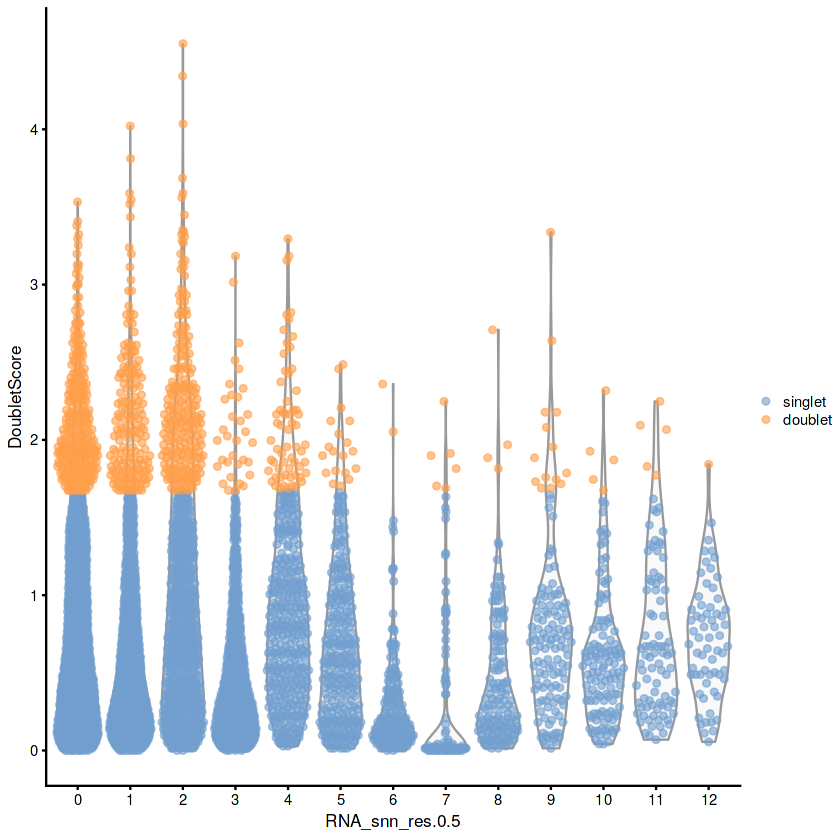

In [12]:
snare <- subset(x=snare, cells=barcode_singlet)

sce <- as.SingleCellExperiment(snare)
dbl.dens <- computeDoubletDensity(sce)
sce$DoubletScore <- dbl.dens
dbl.calls <- doubletThresholding(data.frame(score=dbl.dens),
    method="griffiths", returnType="call")
plotColData(sce, x="RNA_snn_res.0.5", y="DoubletScore", colour_by=I(dbl.calls))

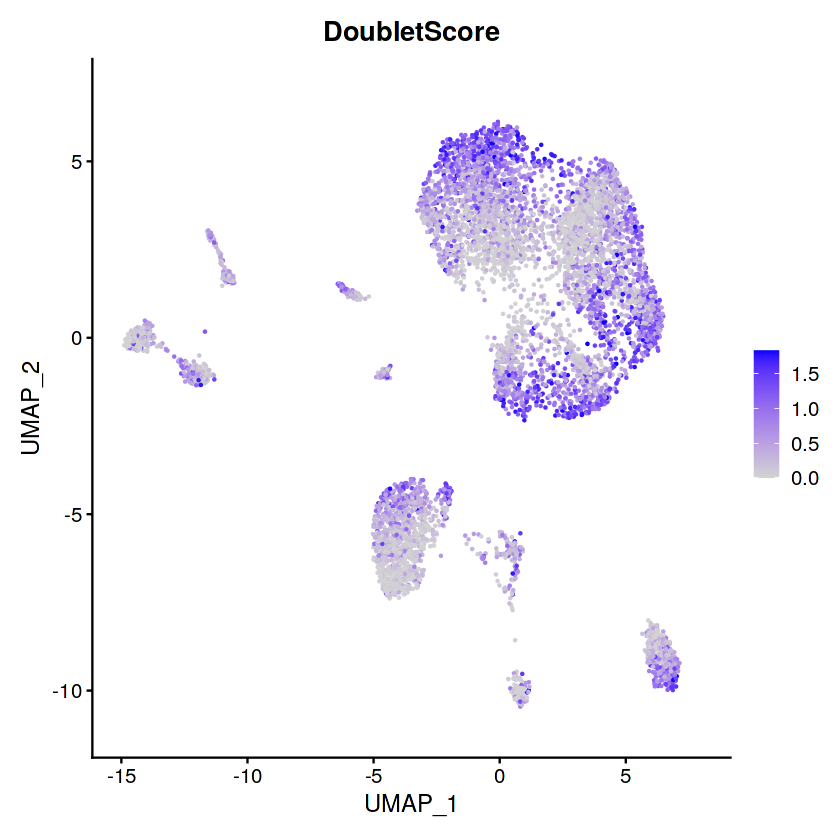

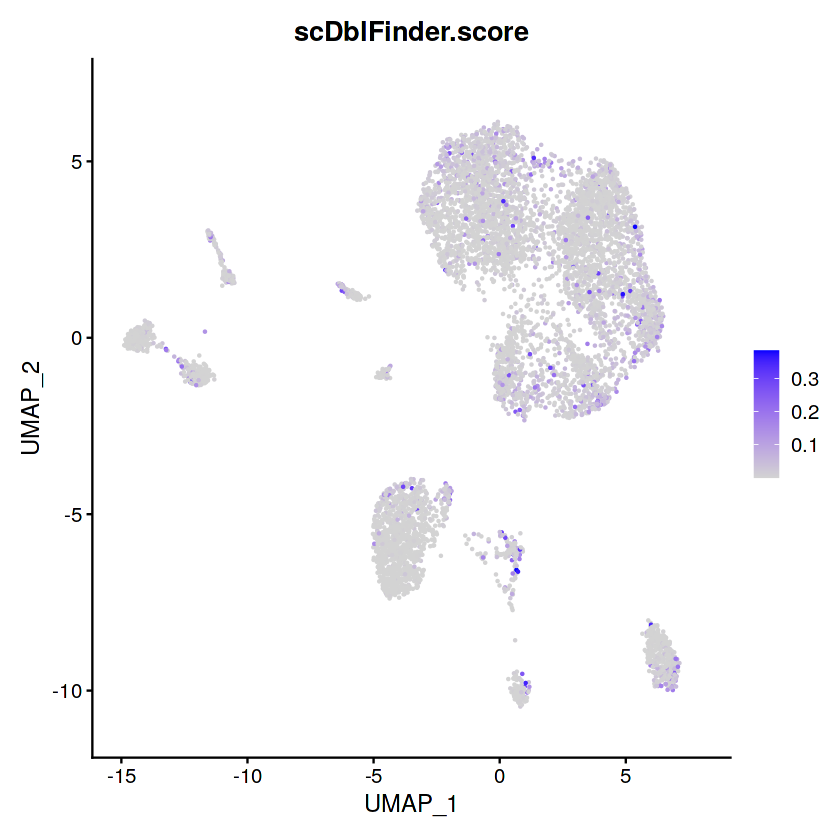

In [13]:
FeaturePlot(snare,features = "DoubletScore") 
FeaturePlot(snare,features = "scDblFinder.score")

In [14]:
dim(snare)

[1] 25403  6981

In [95]:
head(x = snare[[]])

orig.ident nCount_RNA nFeature_RNA percent.mt percent.ribo
09A_CAGCCCCGCCTT 09A        4615       2343         0.3033586  0.2383532   
09A_CGCCTACCATGA 09A        4780       2348         0.2092050  0.1464435   
09A_GATGCGCGGCTA 09A        4867       2494         0.3492911  0.2671050   
09A_GGTCCGAGTCCT 09A        4663       2338         0.2787905  0.4074630   
09A_TCTCCCGGCACC 09A        4337       2157         0.2075167  0.4380908   
09A_ACCAAATCTTGT 09A        4156       2097         0.3609240  0.2646776   
                 RNA_snn_res.0.5 seurat_clusters predicted.id
09A_CAGCCCCGCCTT 0               0               L2/3 IT     
09A_CGCCTACCATGA 6               7               L5 PT       
09A_GATGCGCGGCTA 9               11              Astro       
09A_GGTCCGAGTCCT 3               5               L6 IT       
09A_TCTCCCGGCACC 6               7               L5 PT       
09A_ACCAAATCTTGT 3               5               L6 IT       
                 prediction.score.Vip prediction.score.Lamp5 ⋯
09A_CAGCCCCGCCTT 0.00000000           0.014386250            ⋯
09A_CGCCTACCATGA 0.00000000           0.000000000            ⋯
09A_GATGCGCGGCTA 0.04546471           0.001072446            ⋯
09A_GGTCCGAGTCCT 0.00000000           0.000000000            ⋯
09A_TCTCCCGGCACC 0.00000000           0.000000000            ⋯
09A_ACCAAATCTTGT 0.00000000           0.000000000            ⋯
                 prediction.score.Meis2 prediction.score.Astro
09A_CAGCCCCGCCTT 0.000000000            0.0000000             
09A_CGCCTACCATGA 0.000000000            0.0000000             
09A_GATGCGCGGCTA 0.005430562            0.4313232             
09A_GGTCCGAGTCCT 0.000000000            0.0000000             
09A_TCTCCCGGCACC 0.000000000            0.0000000             
09A_ACCAAATCTTGT 0.000000000            0.0000000             
                 prediction.score.Macrophage prediction.score.VLMC
09A_CAGCCCCGCCTT 0.0000000                   0.00000000           
09A_CGCCTACCATGA 0.0000000                   0.00000000           
09A_GATGCGCGGCTA 0.0000000                   0.08547301           
09A_GGTCCGAGTCCT 0.1516514                   0.00000000           
09A_TCTCCCGGCACC 0.0000000                   0.00000000           
09A_ACCAAATCTTGT 0.0000000                   0.00000000           
                 prediction.score.SMC prediction.score.max RNA_snn_res.0.2
09A_CAGCCCCGCCTT 0                    0.5782354            0              
09A_CGCCTACCATGA 0                    1.0000000            5              
09A_GATGCGCGGCTA 0                    0.4313232            6              
09A_GGTCCGAGTCCT 0                    0.2372081            2              
09A_TCTCCCGGCACC 0                    1.0000000            5              
09A_ACCAAATCTTGT 0                    0.3492309            2              
                 RNA_snn_res.0.4 RNA_snn_res.0.6 RNA_snn_res.0.8
09A_CAGCCCCGCCTT 0               0               0              
09A_CGCCTACCATGA 4               6               7              
09A_GATGCGCGGCTA 6               8               11             
09A_GGTCCGAGTCCT 2               5               5              
09A_TCTCCCGGCACC 4               6               7              
09A_ACCAAATCTTGT 2               5               5

In [15]:
saveRDS(snare, file="snare_rna_2.rds")

# Redo feature selection and clustering

In [16]:
snare <- FindVariableFeatures(snare, nfeatures = 3000)
snare <- NormalizeData(snare)
snare <- ScaleData(snare)

Centering and scaling data matrix



PC_ 1 
Positive:  Atp1a2, Ppap2b, Slc1a3, Ptprz1, Bcan, Ntsr2, F3, Glul, Aldoc, Mertk 
	   Slc7a10, S1pr1, Mt2, Grin2c, Slco1c1, Ndrg2, Prex2, Mt1, Il18, Luzp2 
	   Apoe, Npas3, Gpr37l1, Pla2g7, Htra1, Cd63, Gjb6, Acsbg1, Fgfr3, Daam2 
Negative:  Ptprd, Kcnip4, Opcml, Tenm2, Lingo2, Car10, Kcnq5, Erc2, Hs6st3, Nrxn3 
	   Fam155a, Lrrtm4, Nlgn1, Fam19a1, Kcnb2, Sgcz, Kctd16, Gm28928, Cacna2d3, Pdzrn3 
	   Slit3, Cdh12, Gria4, Fstl4, Asic2, Prkg1, Nwd2, Ptprk, Rbfox1, Efna5 
PC_ 2 
Positive:  Cdh18, Mgat4c, Hs3st4, Foxp2, Zfpm2, Dlc1, Thsd7b, Slc35f1, Me3, Pde4d 
	   Htr1f, Garnl3, A830018L16Rik, Nxph1, Grik3, Fam155a, Rbfox1, Mctp1, Etl4, Ano4 
	   Gabrg3, Grm8, Frmpd4, Grip1, Esrrg, Nrp1, Zfp804a, Sox5, Erbb4, Cntnap4 
Negative:  Lingo2, Hs6st3, Rorb, Unc5d, Pdzrn3, Fam19a1, Cacna2d3, A830036E02Rik, Kcnq5, Kcnb2 
	   Ptprk, Pde7b, Car10, Kcnip4, Fstl4, Ntm, Cdh12, Prr16, Kcnh5, Fam19a2 
	   BC030499, Cpne9, Ptprd, Rora, Cux1, Prkg1, Kctd16, Atp1a2, Nwd2, Gpc6 
PC_ 3 
Positive:  Hs3st4,

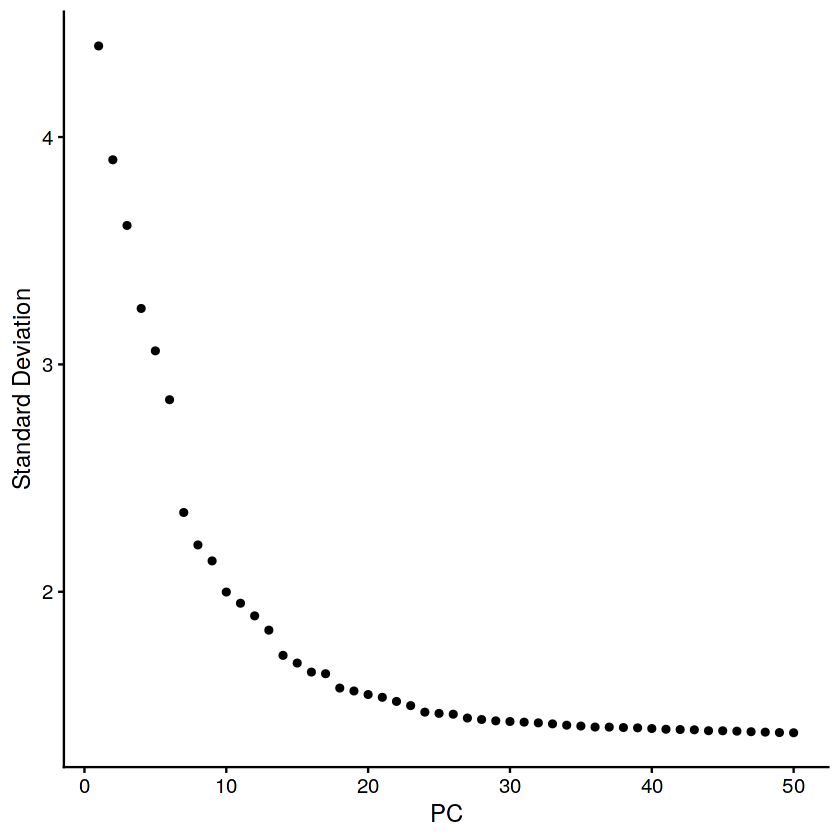

In [17]:
snare <- RunPCA(snare, features = VariableFeatures(object = snare))
ElbowPlot(snare, ndims = 50)

In [18]:
set.seed(1234)
snare <- FindNeighbors(snare, dims = 1:23)
snare <- FindClusters(snare, resolution = 0.4, algorithm = 3)
snare <- FindClusters(snare, resolution = 0.5, algorithm = 3)
snare <- FindClusters(snare, resolution = 0.6, algorithm = 3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6981
Number of edges: 272757

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 13
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6981
Number of edges: 272757

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8973
Number of communities: 13
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6981
Number of edges: 272757

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8834
Number of communities: 14
Elapsed time: 3 seconds


In [19]:
snare <- RunUMAP(snare, dims = 1:23, reduction.name = "umap.rna")

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
19:40:06 UMAP embedding parameters a = 0.9922 b = 1.112

19:40:06 Read 6981 rows and found 23 numeric columns

19:40:06 Using Annoy for neighbor search, n_neighbors = 30

19:40:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:40:07 Writing NN index file to temp file /tmp/RtmpTOWbrU/file1d4432dfd4593

19:40:07 Searching Annoy index using 1 thread, search_k = 3000

19:40:09 Annoy recall = 100%

19:40:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

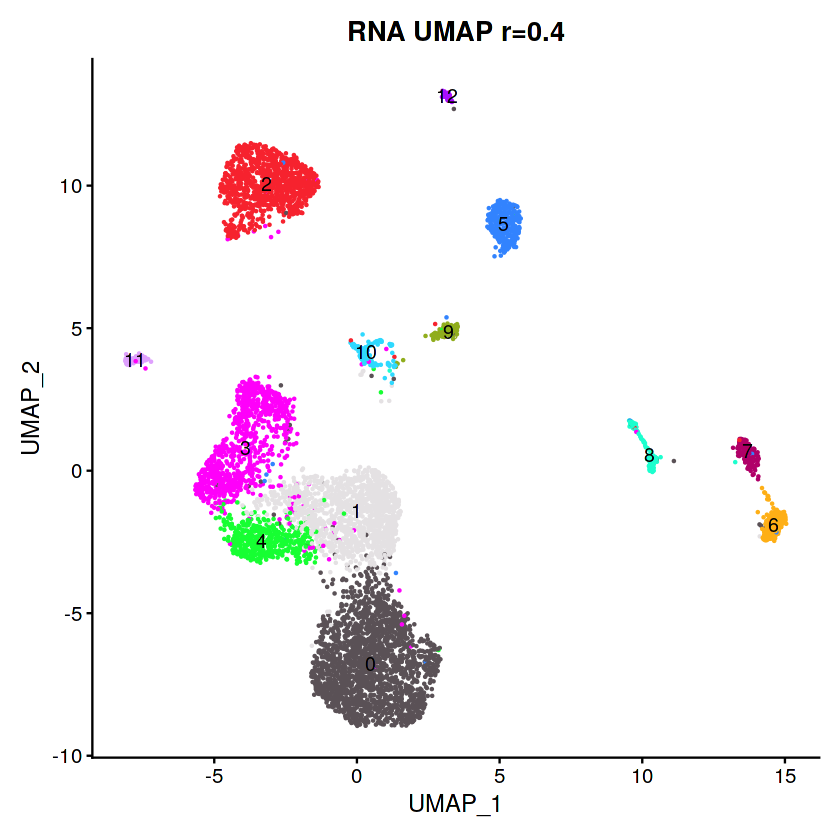

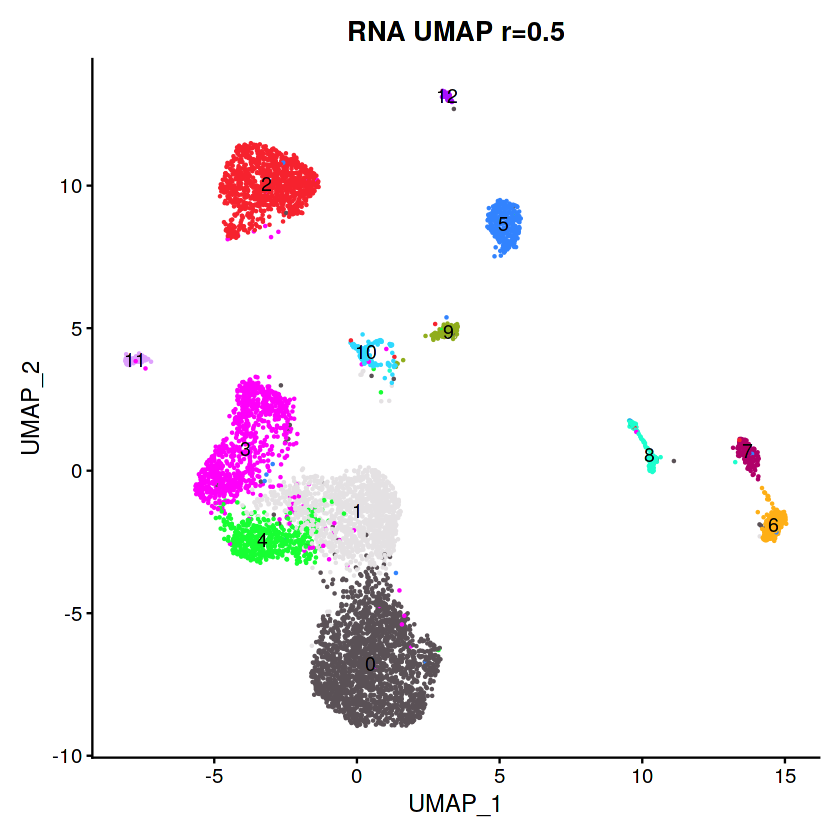

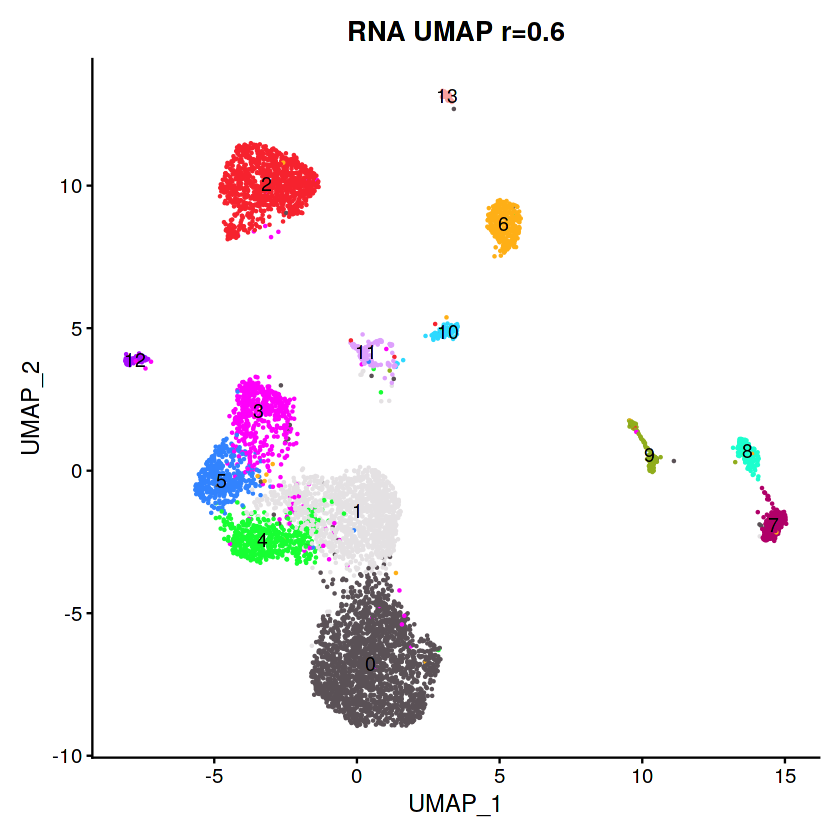

In [20]:
DimPlot(snare, reduction = "umap.rna", label = TRUE, group.by="RNA_snn_res.0.4", cols="polychrome") + NoLegend() + ggtitle("RNA UMAP r=0.4")
DimPlot(snare, reduction = "umap.rna", label = TRUE, group.by="RNA_snn_res.0.5", cols="polychrome") + NoLegend() + ggtitle("RNA UMAP r=0.5")
DimPlot(snare, reduction = "umap.rna", label = TRUE, group.by="RNA_snn_res.0.6", cols="polychrome") + NoLegend() + ggtitle("RNA UMAP r=0.6")

Now the clustering results looks more stable.
So there're indeed a lot of doublets!

Select: r=0.5, ndim=23

# Label transfer

In [21]:
# label transfer from Allen brain
allen <- readRDS("../../raw_data/Chen_2019/GSE126074_AdBrainCortex_rna/allen_brain.rds")

transfer.anchors <- FindTransferAnchors(
  reference = allen,
  query = snare,
  dims = 1:30,
  reduction = 'cca'
)

predicted.labels <- TransferData(
  anchorset = transfer.anchors,
  refdata = allen$subclass,
  weight.reduction = snare[['pca']],
  dims = 1:30
)

snare <- AddMetaData(object = snare, metadata = predicted.labels)

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13093 anchors

Filtering anchors

	Retained 4800 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



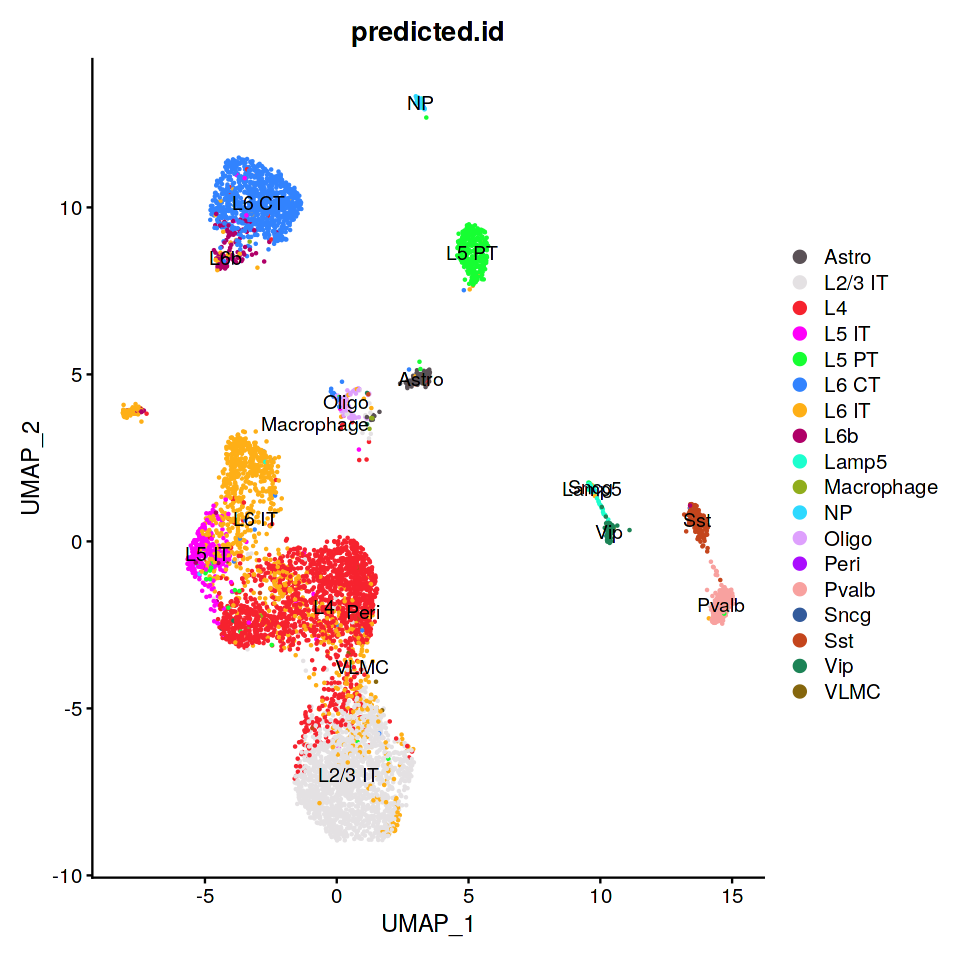

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(snare, group.by = 'predicted.id', label = TRUE, reduction = 'umap.rna',cols="polychrome")

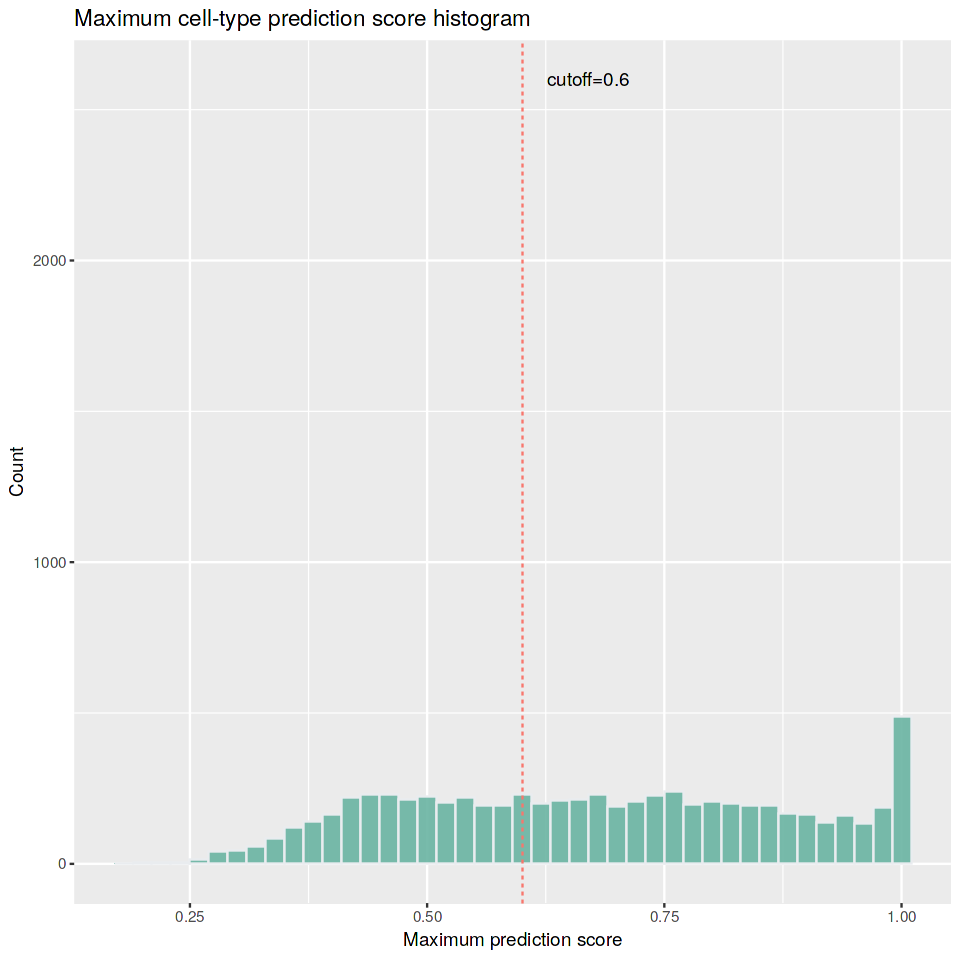

In [23]:
ggplot(snare[["prediction.score.max"]], aes(x=prediction.score.max)) +
  geom_histogram(binwidth=0.02, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
  geom_vline(aes(xintercept=0.6, color="red"),
             linetype="dashed") + 
  theme(legend.position="none") +
  annotate("text", x = 0.67, y = 2600, label = "cutoff=0.6") +
  labs(title="Maximum cell-type prediction score histogram", x="Maximum prediction score", y = "Count")

[[1]]


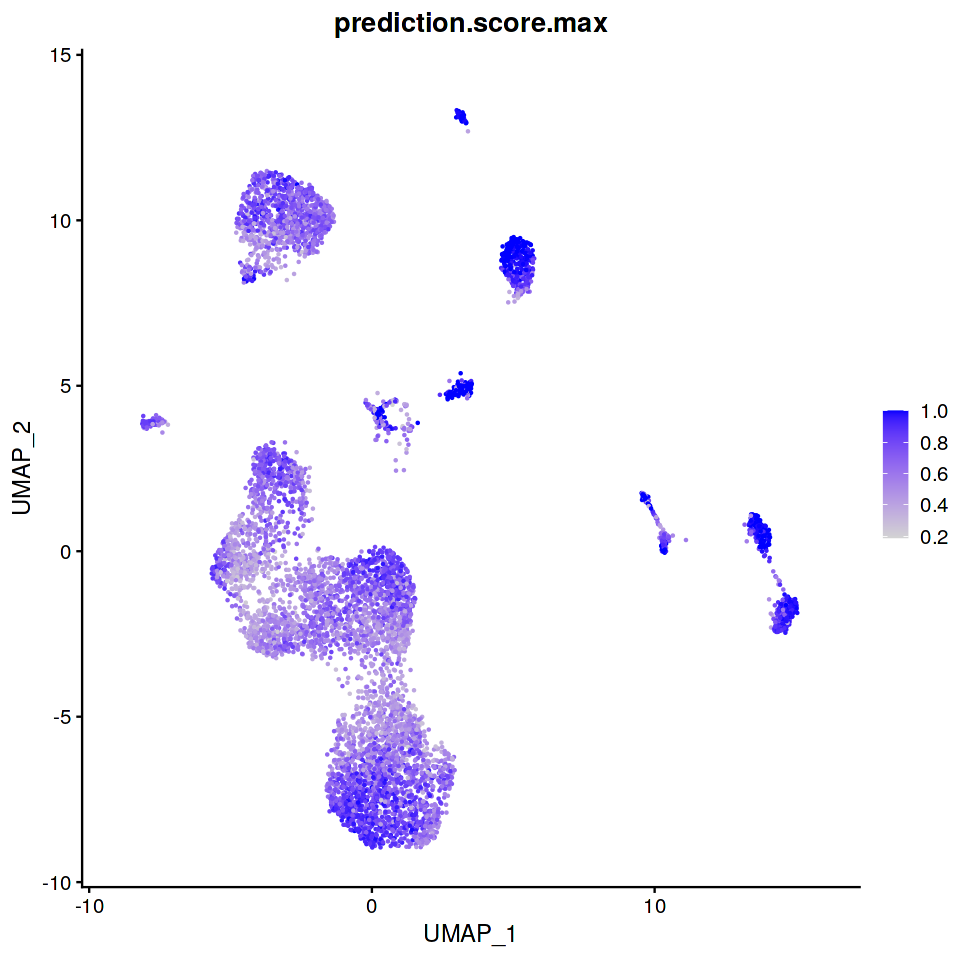

In [24]:
FeaturePlot(snare,features = "prediction.score.max", combine = FALSE)

In [25]:
## Check the consensus between clustering and label transfer
df_count <- dplyr::rename(dplyr::count(snare[[c("RNA_snn_res.0.5","predicted.id")]], RNA_snn_res.0.5, predicted.id), Freq = n) 
df_count <- dplyr::arrange(df_count, RNA_snn_res.0.5, -Freq)


In [26]:
df_count

RNA_snn_res.0.5 predicted.id Freq
1  0               L2/3 IT      1611
2  0               L4            180
3  0               L6 IT         174
4  0               L5 PT           4
5  0               Sst             3
6  0               L5 IT           2
7  0               L6 CT           1
8  0               Pvalb           1
9  0               Sncg            1
10 0               VLMC            1
11 0               Vip             1
12 1               L4           1113
13 1               L6 IT         200
14 1               L2/3 IT         6
15 1               Sst             5
16 1               L5 IT           4
17 1               L5 PT           3
18 1               L6 CT           2
19 1               Peri            1
20 1               VLMC            1
21 2               L6 CT         925
22 2               L6b           105
23 2               L6 IT          16
24 2               L4              7
25 2               L5 IT           5
26 2               Macrophage      1
27 3               L6 IT         636
28 3               L5 IT         226
29 3               L4             23
30 3               L5 PT          12
⋮  ⋮               ⋮            ⋮   
53 6               Sst            1 
54 7               Sst          144 
55 7               L6 CT          1 
56 8               Vip           69 
57 8               Lamp5         56 
58 8               L6 IT          1 
59 8               Sst            1 
60 9               Astro        114 
61 9               L6 CT          4 
62 9               L2/3 IT        2 
63 9               L4             2 
64 9               L6 IT          2 
65 9               L5 PT          1 
66 9               Sst            1 
67 10              Oligo         77 
68 10              L2/3 IT       14 
69 10              L6 CT         14 
70 10              L6 IT          3 
71 10              Macrophage     3 
72 10              Astro          2 
73 10              L4             2 
74 10              L5 PT          2 
75 10              Sst            2 
76 10              L5 IT          1 
77 10              NP             1 
78 10              Vip            1 
79 11              L6 IT         77 
80 11              L6b           10 
81 11              L4             1 
82 12              NP            63

In [28]:
df_count[30:60,]

RNA_snn_res.0.5 predicted.id Freq
30 3               L5 PT         12 
31 3               L6b           11 
32 3               L6 CT          9 
33 3               L2/3 IT        4 
34 3               NP             2 
35 3               VLMC           2 
36 3               Lamp5          1 
37 4               L4           437 
38 4               L6 IT         24 
39 4               L5 IT         23 
40 4               L2/3 IT        8 
41 4               L5 PT          4 
42 4               Macrophage     2 
43 4               Astro          1 
44 4               L6b            1 
45 4               Pvalb          1 
46 4               Vip            1 
47 5               L5 PT        304 
48 5               L6 IT          9 
49 5               L2/3 IT        2 
50 5               L6 CT          2 
51 5               Sst            1 
52 6               Pvalb        190 
53 6               Sst            1 
54 7               Sst          144 
55 7               L6 CT          1 
56 8               Vip           69 
57 8               Lamp5         56 
58 8               L6 IT          1 
59 8               Sst            1 
60 9               Astro        114

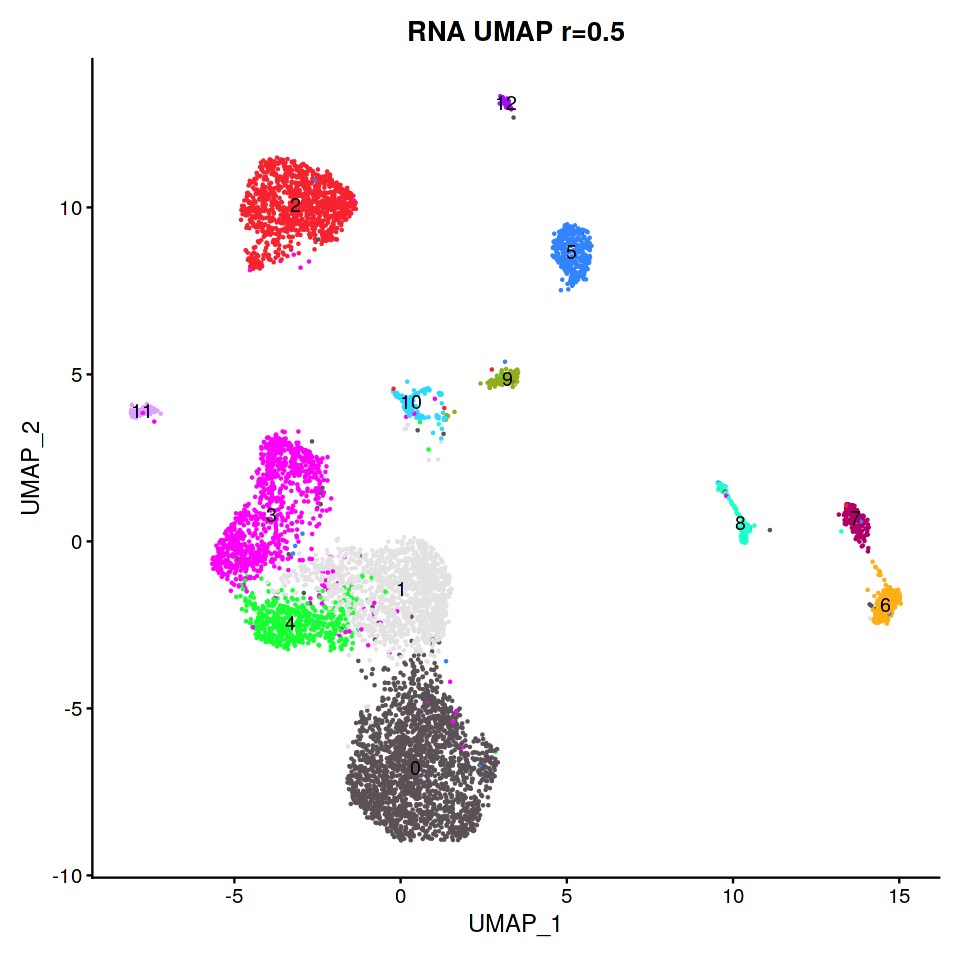

In [29]:
DimPlot(snare, reduction = "umap.rna", label = TRUE, group.by="RNA_snn_res.0.5", cols="polychrome") + NoLegend() + ggtitle("RNA UMAP r=0.5")

In [30]:
table(snare$predicted.id)


     Astro    L2/3 IT         L4      L5 IT      L5 PT      L6 CT      L6 IT 
       117       1647       1765        261        330        958       1142 
       L6b      Lamp5 Macrophage         NP      Oligo       Peri      Pvalb 
       127         57          6         66         77          1        192 
      Sncg        Sst        Vip       VLMC 
         1        158         72          4 

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 17339 by 3320

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3320 cells



  |======================================================================| 100%


Found 70 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 17339 genes



  |======================================================================| 100%


Computing corrected count matrix for 17339 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 56.49295 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  Hs6st3, Lingo2, Rorb, Unc5d, Cacna2d3, Grm7, Lrrc4c, Fam19a2, Rora, R3hdm1 
	   Tenm2, Kcnq5, Prr16, Brinp3, Brinp1, Cdh12, Zmat4, Mef2c, Kcnh5, Pdzrn3 
	   Nell1, Camk2n1, Ptprd, Gria4, Cux1, A830036E02Rik, Rcan2, Fam19a1, Fstl4, Tmem145 
Negative:  Mgat4c, Cdh18, Hs3st4, Zfpm2, Gm28928, Pde4d, Rbfox1, Foxp2, Gria3, Fam155a 
	   Me3, Garnl3, Frmpd4, Thsd7b, Nkain2, Mctp1, Pde1a, Dlc1, Grm8, Gabrg3 
	   Nrp1, Nfia, Htr1f, Slc35f1, A830018L16Rik, Nos1ap, Pdzrn4, Lrp1b, Etl4, Tle4 
PC_ 2 
Positive:  Brinp3, Hs3st4, Rorb, Pcdh9, Kcnh7, Foxp2, Cdh18, Astn2, Zfpm2, Cadps2 
	   Nrxn3, Zmat4, Garnl3, Mgat4c, Cux1, Unc5d, Rcan2, R3hdm1, Rbfox1, Frmpd4 
	   Fam19a2, Sept4, Pld5, Kcnab3, Brinp1, Col5a1, Trhde, Plcb4, Prkg1, Ephb1 
Negative:  Il1rapl2, Ntm, Lrrtm4, Gpc6, Kirrel

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3320
Number of edges: 117347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8863
Number of communities: 5
Elapsed time: 0 seconds


19:52:39 UMAP embedding parameters a = 0.9922 b = 1.112

19:52:39 Read 3320 rows and found 10 numeric columns

19:52:39 Using Annoy for neighbor search, n_neighbors = 30

19:52:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:52:39 Writing NN index file to temp file /tmp/RtmpTOWbrU/file1d4432a44d885

19:52:39 Searching Annoy index using 1 thread, search_k = 3000

19:52:40 Annoy recall = 100%

19:52:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:52:43 Initializing from normalized Laplacian + noise (using irlba)

19:52:43 Commencing optimization for 500 epochs, with 132360 positive edges

19:52:48 Optimization finished

Warning message:
"Cannot add objects with duplicate keys (offending key: UMAP_), setting key to 'uma

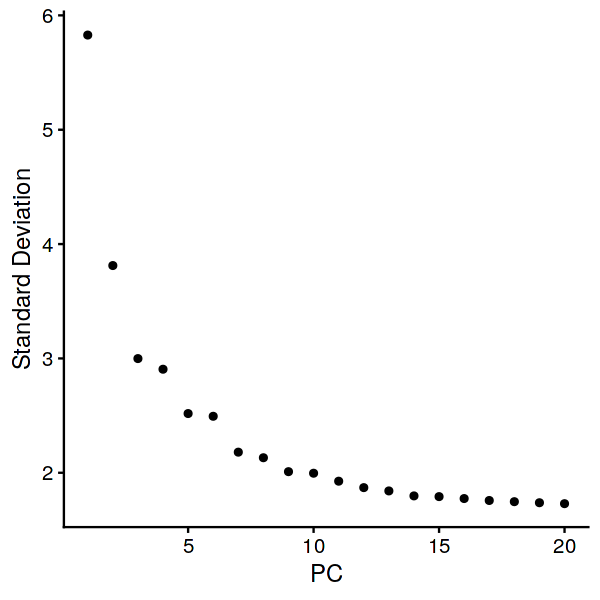

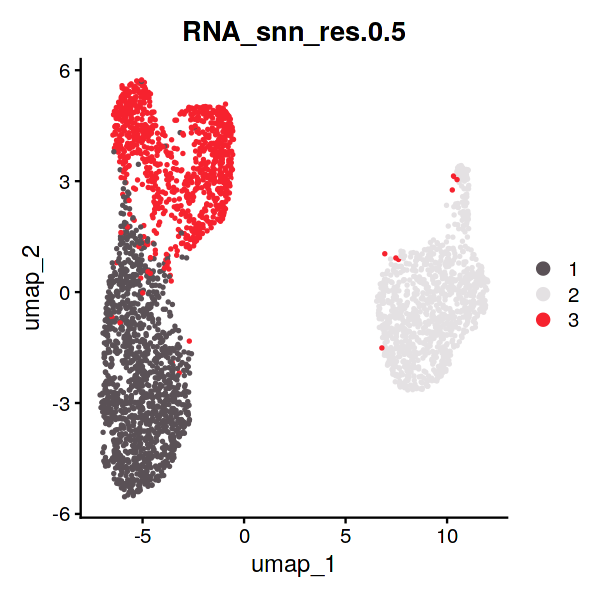

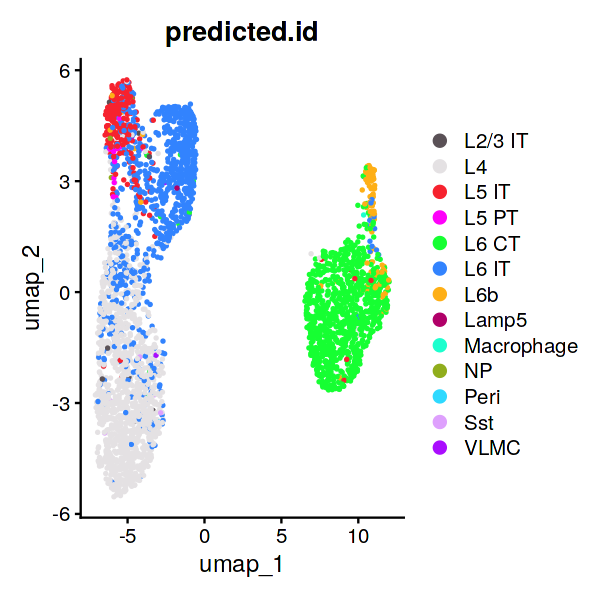

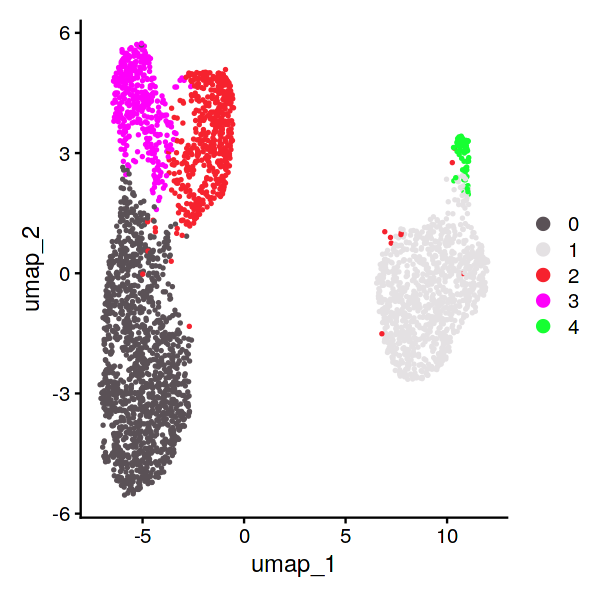

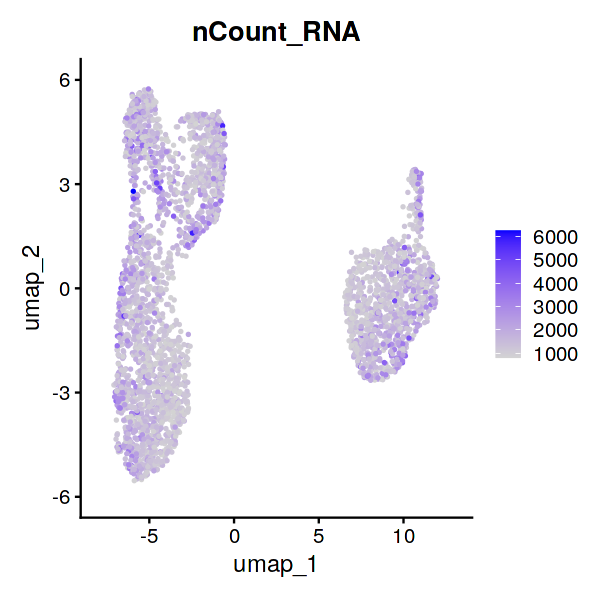

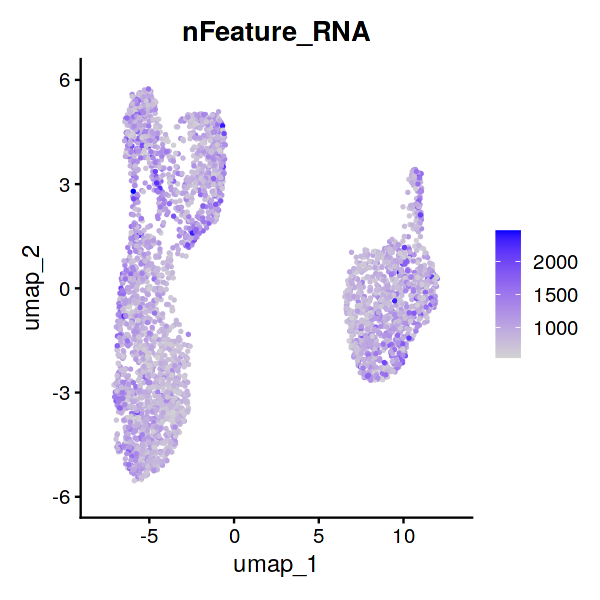

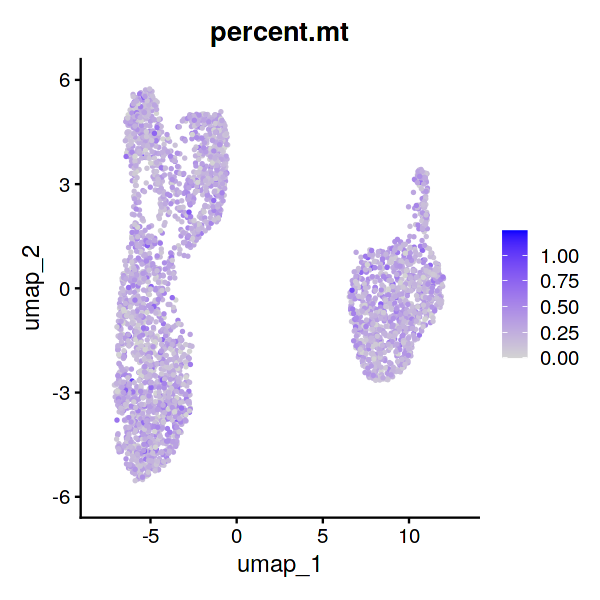

In [31]:
options(repr.plot.width=5, repr.plot.height=5)
snare_sub <- subset(x=snare, subset=RNA_snn_res.0.5 %in% c(1,2,3))
snare_sub <- SCTransform(snare_sub)
snare_sub <- RunPCA(snare_sub, features = VariableFeatures(object = snare_sub))
ElbowPlot(snare_sub)
snare_sub <- FindNeighbors(snare_sub, dims = 1:10)
snare_sub <- FindClusters(snare_sub, resolution = 0.3)
snare_sub <- RunUMAP(snare_sub, dims = 1:10)

DimPlot(snare_sub, reduction = "umap",group.by="RNA_snn_res.0.5",cols="polychrome")
DimPlot(snare_sub, reduction = "umap",group.by="predicted.id",cols="polychrome")
DimPlot(snare_sub, reduction = "umap",cols="polychrome")
FeaturePlot(snare_sub,features = "nCount_RNA")
FeaturePlot(snare_sub,features = "nFeature_RNA")
FeaturePlot(snare_sub,features = "percent.mt")


Do not split cluster 1, 2
Not sure about ?3 ?8

In [43]:
## Take the annotation for the majority of the clusters as the final label
snare$major_label <- NA

for (i in c(0,1,2,4,5,6,7,9,10,11,12)) {
  snare$major_label[snare$RNA_snn_res.0.5==i] <- df_count[df_count$RNA_snn_res.0.5==i,"predicted.id"][[1]]
}
snare$major_label[snare$RNA_snn_res.0.5==8] <- "Vip/Lamp5"
snare$major_label[snare$RNA_snn_res.0.5==1] <- "L4_1"
snare$major_label[snare$RNA_snn_res.0.5==4] <- "L4_2"
snare$major_label[snare$RNA_snn_res.0.5==3] <- "L5/6 IT"

In [44]:
snare$final_label <- as.factor(snare$major_label)
Idents(snare) <- snare$final_label

In [45]:
table(snare$final_label)


    Astro   L2/3 IT      L4_1      L4_2     L5 PT   L5/6 IT     L6 CT     L6 IT 
      126      1979      1335       502       318       926      1059        88 
       NP     Oligo     Pvalb       Sst Vip/Lamp5 
       63       122       191       145       127 

In [75]:
head(snare[[]])

orig.ident nCount_RNA nFeature_RNA percent.mt percent.ribo
09A_ACGGACTACGCT 09A        3224       1684         0.2791563  0.1240695   
09A_CATGTGTCACCC 09A        3790       1814         0.1319261  0.2374670   
09A_GACACCCGCACC 09A        3880       1786         0.3865979  0.3092784   
09A_ATTAATCGAGTA 09A        3159       1713         0.1266223  0.2215891   
09A_CATGTTCAATAA 09A        3254       1649         0.2458513  0.2765827   
09A_AGGTCTCATCAC 09A        3088       1769         0.1295337  0.3562176   
                 RNA_snn_res.0.4 seurat_clusters RNA_snn_res.0.5
09A_ACGGACTACGCT 1               1               1              
09A_CATGTGTCACCC 4               4               4              
09A_GACACCCGCACC 0               0               0              
09A_ATTAATCGAGTA 0               0               0              
09A_CATGTTCAATAA 4               4               4              
09A_AGGTCTCATCAC 5               5               5              
                 RNA_snn_res.0.6 DoubletScore ⋯ prediction.score.L5.IT
09A_ACGGACTACGCT 1               1.290702     ⋯ 0.06292639            
09A_CATGTGTCACCC 4               0.767886     ⋯ 0.57841858            
09A_GACACCCGCACC 0               0.898590     ⋯ 0.00000000            
09A_ATTAATCGAGTA 0               1.568448     ⋯ 0.00000000            
09A_CATGTTCAATAA 4               0.522816     ⋯ 0.55861647            
09A_AGGTCTCATCAC 5               0.620844     ⋯ 0.00000000            
                 prediction.score.Oligo prediction.score.Meis2
09A_ACGGACTACGCT 0                      0                     
09A_CATGTGTCACCC 0                      0                     
09A_GACACCCGCACC 0                      0                     
09A_ATTAATCGAGTA 0                      0                     
09A_CATGTTCAATAA 0                      0                     
09A_AGGTCTCATCAC 0                      0                     
                 prediction.score.Astro prediction.score.Macrophage
09A_ACGGACTACGCT 0                      0                          
09A_CATGTGTCACCC 0                      0                          
09A_GACACCCGCACC 0                      0                          
09A_ATTAATCGAGTA 0                      0                          
09A_CATGTTCAATAA 0                      0                          
09A_AGGTCTCATCAC 0                      0                          
                 prediction.score.VLMC prediction.score.SMC
09A_ACGGACTACGCT 0                     0                   
09A_CATGTGTCACCC 0                     0                   
09A_GACACCCGCACC 0                     0                   
09A_ATTAATCGAGTA 0                     0                   
09A_CATGTTCAATAA 0                     0                   
09A_AGGTCTCATCAC 0                     0                   
                 prediction.score.max major_label final_label
09A_ACGGACTACGCT 0.8396235            L4          L4         
09A_CATGTGTCACCC 0.5784186            L4          L4         
09A_GACACCCGCACC 0.9450375            L2/3 IT     L2/3 IT    
09A_ATTAATCGAGTA 0.8348388            L2/3 IT     L2/3 IT    
09A_CATGTTCAATAA 0.5586165            L4          L4         
09A_AGGTCTCATCAC 0.9897756            L5 PT       L5 PT

In [46]:
saveRDS(snare, file = "snare_rna_3.rds")

# Save ground truth

In [ ]:
df <- snare[[c("final_label")]]
df$barcode <- rownames(df)
head(df)

final_label barcode         
09A_CGCCTACCATGA L5 PT       09A_CGCCTACCATGA
09A_TCTCCCGGCACC L5 PT       09A_TCTCCCGGCACC
09A_ACGGACTACGCT L4_1        09A_ACGGACTACGCT
09A_TAAGGAAGAGGA L6 CT       09A_TAAGGAAGAGGA
09A_CATGTGTCACCC L4_2        09A_CATGTGTCACCC
09A_GACACCCGCACC L2/3 IT     09A_GACACCCGCACC

In [48]:
df_atac <- read.table("Cells_atac_Chen_2019.txt", col.names = "barcode")
head(df_atac)

barcode         
1 09E_CCCGTGTTATCT
2 09G_ACATCTCCGAGC
3 09B_GAAGTTCTGCTC
4 09I_ACTCGTTGGTCA
5 09G_ATCTCCGAGCCC
6 09I_TGGCTGTCCCCG

In [96]:
df1 <- read.table("../../raw_data/Chen_2019/GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv", col.names = "barcode")
df2 <- read.table("../../raw_data/Chen_2019/GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv", col.names = "barcode")

In [97]:
head(df1)
dim(df1)

barcode         
1 09A_CAGCCCCGCCTT
2 09A_CGCCTACCATGA
3 09A_GATGCGCGGCTA
4 09A_GGTCCGAGTCCT
5 09A_TCTCCCGGCACC
6 09A_ACCAAATCTTGT

[1] 10309     1

In [98]:
head(df2)
dim(df2)

barcode         
1 09A_GATGCGCGGCTA
2 09A_GCCATGACCCCA
3 09F_TGGACGATTTGT
4 09K_GTCTGCCATTAC
5 09F_GGATGAAGAGGG
6 09C_AGCCCGCCATGG

[1] 10309     1

In [99]:
dim(merge(x = df1, y = df2, by = "barcode"))

[1] 10309     1

In [102]:
dim(merge(x = df_atac, y = df2, by = "barcode"))

[1] 7712    1

In [82]:
dim(df)

[1] 5872    2

In [83]:
dim(df_atac)

[1] 10408     1

In [53]:
dim(merge(x = df, y = df_atac, by = "barcode"))

[1] 5199    2

In [49]:
table(merge(x = df, y = df_atac, by = "barcode")$final_label)


    Astro   L2/3 IT      L4_1      L4_2     L5 PT   L5/6 IT     L6 CT     L6 IT 
       75      1445      1059       417       286       695       771        68 
       NP     Oligo     Pvalb       Sst Vip/Lamp5 
       33        66       109        95        80 

In [50]:
df_new <- merge(x = df, y = df_atac, by = "barcode")

In [51]:
write.table(df_new, file='Chen_2019_RNA_annotation.txt', sep='\t', quote = FALSE, row.names=FALSE, col.names=TRUE)

In [52]:
write.table(df_new$barcode, file='Cells_Chen_2019.txt', sep='\t', quote = FALSE, row.names=FALSE, col.names=FALSE)